### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import Data

In [4]:
# main folder
path = r'C:\Users\steve\Documents\Olist Marketplace Analysis'

# data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_flags.pkl'))

In [5]:
# pd display settings
pd.set_option('display.max_columns', 30)

### Data Summary

In [7]:
df.head(3)

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue,unq_products_sold,revenue_flag,frequency_flag
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00,81,Low revenue,New customer
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3,51.00,2,Low revenue,New customer
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27,37,High revenue,New customer


In [8]:
df.shape

(118307, 30)

#### Extreme Values Check

*Sold Unique Products* ---

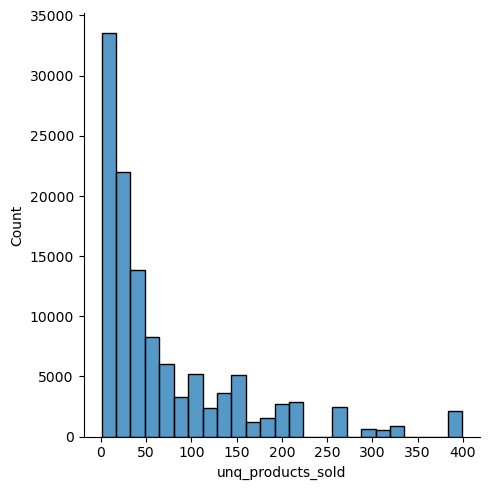

In [11]:
sns.displot(df['unq_products_sold'], bins=25)

In [12]:
(round(df['unq_products_sold'].mean(), 2)), df['unq_products_sold'].min(), df['unq_products_sold'].max()

(71.26, 1, 399)

*Total Revenue* ---

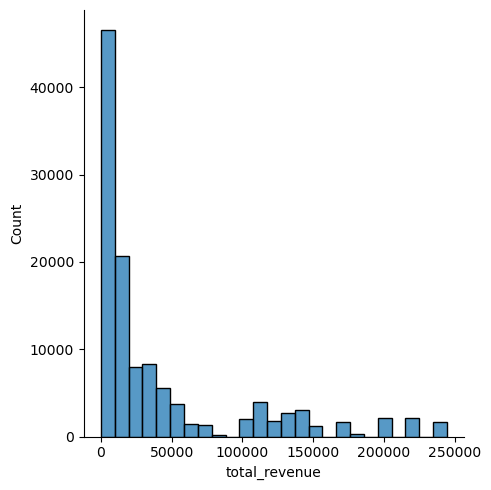

In [14]:
sns.displot(df['total_revenue'], bins=25)

In [15]:
(round(df['total_revenue'].mean(), 2)), df['total_revenue'].min(), df['total_revenue'].max()

(42826.04, 3.5, 244627.55)

### Data Prep for Regression Analysis

**Hypothesis Exploring** Olist sellers who are selling a variety of products will have higher total revenue.

#### 1. Visualize Variables

In [19]:
# create df for regression using only cols needed
df_reg = df[['unq_products_sold', 'total_revenue']] 

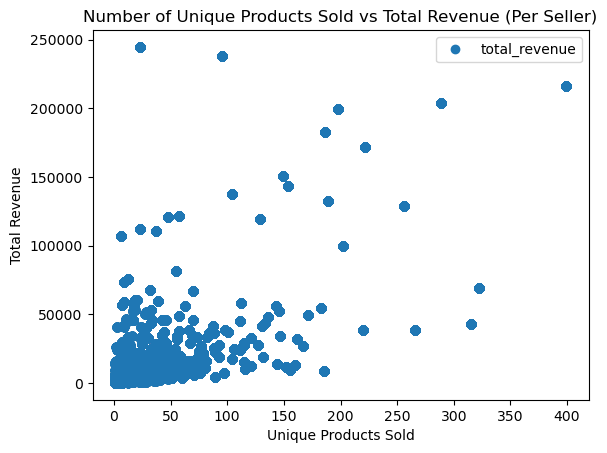

In [20]:
# scatterplot -> unq_products_sold vs total_revenue
df_reg.plot(x = 'unq_products_sold', y='total_revenue',style='o')
plt.title('Number of Unique Products Sold vs Total Revenue (Per Seller)')  
plt.xlabel('Unique Products Sold')  
plt.ylabel('Total Revenue')  
plt.show()

In [21]:
df_reg.isnull().sum()

unq_products_sold    0
total_revenue        0
dtype: int64

In [22]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   unq_products_sold  118307 non-null  int64  
 1   total_revenue      118307 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [23]:
df_reg.describe().round()

,unq_products_sold,total_revenue
count,118307.0,118307.0
mean,71.0,42826.0
std,84.0,58614.0
min,1.0,4.0
25%,14.0,5154.0
50%,37.0,14684.0
75%,104.0,48838.0
max,399.0,244628.0


#### 2. Standardize Data

In [25]:
X1 = df_reg.iloc[:, 0:2]

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaleStandard = StandardScaler()

In [28]:
X1 = scaleStandard.fit_transform(X1)

In [29]:
X1 = pd.DataFrame(X1, columns = ['unq_products_sold', 'total_revenue'])

In [30]:
X1.head()

,unq_products_sold,total_revenue
0,0.115563,-0.457863
1,-0.822092,-0.729778
2,-0.406675,1.160056
3,1.789101,2.200142
4,1.789101,2.200142


In [31]:
X1.describe().round(2)

,unq_products_sold,total_revenue
count,118307.00,118307.00
mean,-0.00,-0.00
std,1.00,1.00
min,-0.83,-0.73
25%,-0.68,-0.64
50%,-0.41,-0.48
75%,0.39,0.10
max,3.89,3.44


#### 3.Reshape & Split Data

In [33]:
# reshape variables into NumPy arrays and put into separate objects
X = X1['unq_products_sold'].values.reshape(-1,1)
y = X1['total_revenue'].values.reshape(-1,1)

In [34]:
X

array([[ 0.11556328],
       [-0.82209239],
       [-0.40667532],
       ...,
       [-0.78648521],
       [-0.82209239],
       [ 1.78910063]])

In [35]:
y

array([[-0.45786265],
       [-0.72977844],
       [ 1.16005627],
       ...,
       [-0.71480055],
       [-0.61072785],
       [ 2.20014185]])

In [36]:
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [38]:
# create regression analysis
regression = LinearRegression()

In [39]:
# fit the regression object into the training set
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

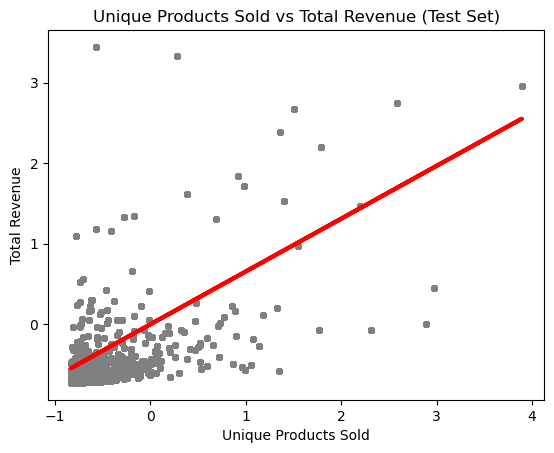

In [41]:
# plot the regression line form the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Unique Products Sold vs Total Revenue (Test Set)')
plot_test.xlabel('Unique Products Sold')
plot_test.ylabel('Total Revenue')
plot_test.show()

**Insights:** There is a moderately steep slope indicating that as the number of unique products sold increase, revenue does generally increase. However, points do not cluster around the trend line but rather have a wide distribution outside the trend line which indicates that this is not a consistent trend. Instead there is a wide variability between number of unique products and translation into sales. Some sellers make more revenue with limited unique products sold, while others sell alot of variety but have much lower total revenue. 

In [43]:
# model summeray statistics
rmse = mean_squared_error(y_test, y_predicted) #mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65618354]]
Mean squared error:  0.579672996519435
R2 score:  0.4250064227250503


**Model Accuracy:** With a mean squared error of 0.58, model accuracy is low meaning predication wouldn't be dependable. This relationship would need a different model type than linear regression for accurate predictions. The R2 score, 0.43, also indicates a poor fit.

*The table below emphasizes this point by illustrating the disparity between actual and predicted values.*

In [46]:
# datatframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.442905,-0.378528
1,1.841271,0.602795
2,-0.696442,-0.518717
3,2.951522,2.549865
4,-0.700045,-0.518717
5,-0.701412,-0.456411
6,0.227126,-0.417470
7,-0.156446,0.010886
8,-0.670619,-0.417470
9,-0.730222,-0.542082


**Compare how the regression fits the training set**

In [48]:
# predict X_train
y_predicted_train = regression.predict(X_train)

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65618354]]
Mean squared error:  0.5635461545835944
R2 score:  0.43447906631828925


**Insight:** Fitting the model to the training shows minimal to negligible increases in accuracy, shown by the 0.01 increase in R2 score (a rise from 0.425 to 0.434). This confirms the model inaccuracy. 

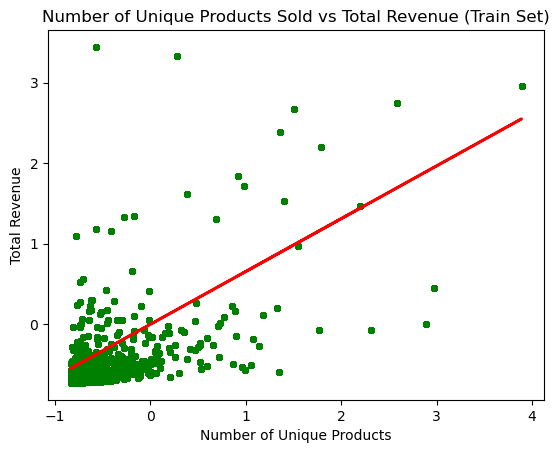

In [51]:
# plot the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=2)
plot_test.title('Number of Unique Products Sold vs Total Revenue (Train Set)')
plot_test.xlabel('Number of Unique Products')
plot_test.ylabel('Total Revenue')
plot_test.show()

**Conclusion:** The hypothesis "Olist sellers who are selling a variety of products will have higher total revenue" is only partially true. There is a lot of variance in the data that can't be explained by a linear relationship between the variables present, indicated other factors come into play when determining seller revenue performance.